## SHAP - SHapley Additive exPlanations
Pradinio duomenų paruošimas, modelio apmokymas.

In [2]:
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import os


df = pd.read_csv('Student Depression Dataset.csv')

df = df.dropna()

cat_cols = [
    'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
    'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress',
    'Family History of Mental Illness', 'Depression'
]
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(['Depression', 'id'], axis=1) 
y = df['Depression']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Modelio tikslumas: {accuracy:.4f}")

Epoch 1/100
558/558 [==============================] - 4s 7ms/step - loss: 0.4061 - accuracy: 0.8205 - val_loss: 0.3605 - val_accuracy: 0.8457
Epoch 2/100
558/558 [==============================] - 4s 7ms/step - loss: 0.3589 - accuracy: 0.8433 - val_loss: 0.3552 - val_accuracy: 0.8481
Epoch 3/100
558/558 [==============================] - 4s 7ms/step - loss: 0.3548 - accuracy: 0.8452 - val_loss: 0.3531 - val_accuracy: 0.8492
Epoch 4/100
558/558 [==============================] - 4s 7ms/step - loss: 0.3518 - accuracy: 0.8463 - val_loss: 0.3514 - val_accuracy: 0.8526
Epoch 5/100
558/558 [==============================] - 3s 6ms/step - loss: 0.3508 - accuracy: 0.8474 - val_loss: 0.3515 - val_accuracy: 0.8486
Epoch 6/100
558/558 [==============================] - 3s 5ms/step - loss: 0.3495 - accuracy: 0.8483 - val_loss: 0.3513 - val_accuracy: 0.8510
Epoch 7/100
558/558 [==============================] - 3s 6ms/step - loss: 0.3490 - accuracy: 0.8470 - val_loss: 0.3521 - val_accuracy: 0.8490

SHAP modelio apmokymas- pasirenkame atsitiktinius duomenis ir pasinaudojame jais apmokyti modelį. Rezultatai išgaunami pirmiesiems 100 duomenų rinkinio eilučių.

In [ ]:
X_background = scaler.transform(X.sample(n=100, random_state=42))
X_sample = X_test[:100]  

explainer = shap.Explainer(model.predict, X_background)
shap_values = explainer(X_sample)
shap_values.feature_names = X.columns.tolist()

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 2/100 [00:00<?, ?it/s]

39/39 [==============================] - 0s 4ms/step


PermutationExplainer explainer:   4%|▍         | 4/100 [00:18<04:51,  3.03s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 5/100 [00:25<07:17,  4.60s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 6/100 [00:29<07:09,  4.57s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 7/100 [00:34<06:56,  4.48s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 8/100 [00:38<06:41,  4.36s/it]

42/42 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   9%|▉         | 9/100 [00:42<06:28,  4.27s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 10/100 [00:46<06:32,  4.36s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 11/100 [00:51<06:29,  4.38s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 12/100 [00:55<06:15,  4.27s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 13/100 [00:59<06:03,  4.18s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 14/100 [01:02<05:33,  3.88s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 15/100 [01:05<05:09,  3.64s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 16/100 [01:08<04:55,  3.52s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 17/100 [01:12<04:44,  3.43s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 18/100 [01:15<04:31,  3.31s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 19/100 [01:18<04:20,  3.21s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 20/100 [01:20<04:02,  3.03s/it]

40/40 [==============================] - 0s 973us/step


PermutationExplainer explainer:  21%|██        | 21/100 [01:23<03:57,  3.01s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 22/100 [01:26<03:58,  3.06s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 23/100 [01:29<03:48,  2.97s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 24/100 [01:32<03:51,  3.04s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 25/100 [01:36<03:54,  3.12s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 26/100 [01:39<03:53,  3.16s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 27/100 [01:42<03:54,  3.22s/it]

41/41 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  28%|██▊       | 28/100 [01:46<04:13,  3.52s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 29/100 [01:50<04:19,  3.65s/it]

41/41 [==============================] - 0s 947us/step


PermutationExplainer explainer:  30%|███       | 30/100 [01:53<04:04,  3.50s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 31/100 [01:56<03:49,  3.32s/it]

42/42 [==============================] - 0s 965us/step


PermutationExplainer explainer:  32%|███▏      | 32/100 [01:59<03:35,  3.17s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 33/100 [02:03<03:40,  3.29s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 34/100 [02:06<03:39,  3.32s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 35/100 [02:10<03:37,  3.35s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 36/100 [02:13<03:33,  3.34s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 37/100 [02:16<03:33,  3.39s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 38/100 [02:19<03:22,  3.27s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 39/100 [02:22<03:07,  3.08s/it]

42/42 [==============================] - 0s 932us/step


PermutationExplainer explainer:  40%|████      | 40/100 [02:25<02:55,  2.93s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 41/100 [02:28<03:03,  3.10s/it]

42/42 [==============================] - 0s 954us/step


PermutationExplainer explainer:  42%|████▏     | 42/100 [02:31<02:52,  2.97s/it]

42/42 [==============================] - 0s 905us/step


PermutationExplainer explainer:  43%|████▎     | 43/100 [02:33<02:44,  2.88s/it]

39/39 [==============================] - 0s 964us/step


PermutationExplainer explainer:  44%|████▍     | 44/100 [02:36<02:34,  2.77s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 45/100 [02:39<02:29,  2.72s/it]

41/41 [==============================] - 0s 928us/step


PermutationExplainer explainer:  46%|████▌     | 46/100 [02:41<02:23,  2.66s/it]

42/42 [==============================] - 0s 930us/step


PermutationExplainer explainer:  47%|████▋     | 47/100 [02:44<02:18,  2.61s/it]

41/41 [==============================] - 0s 924us/step


PermutationExplainer explainer:  48%|████▊     | 48/100 [02:46<02:14,  2.58s/it]

40/40 [==============================] - 0s 997us/step


PermutationExplainer explainer:  49%|████▉     | 49/100 [02:49<02:10,  2.56s/it]

42/42 [==============================] - 0s 927us/step


PermutationExplainer explainer:  50%|█████     | 50/100 [02:51<02:08,  2.57s/it]

42/42 [==============================] - 0s 939us/step


PermutationExplainer explainer:  51%|█████     | 51/100 [02:54<02:06,  2.59s/it]

41/41 [==============================] - 0s 958us/step


PermutationExplainer explainer:  52%|█████▏    | 52/100 [02:56<02:03,  2.57s/it]

41/41 [==============================] - 0s 924us/step


PermutationExplainer explainer:  53%|█████▎    | 53/100 [02:59<02:01,  2.59s/it]

40/40 [==============================] - 0s 938us/step


PermutationExplainer explainer:  54%|█████▍    | 54/100 [03:02<01:59,  2.59s/it]

42/42 [==============================] - 0s 901us/step


PermutationExplainer explainer:  55%|█████▌    | 55/100 [03:04<01:55,  2.57s/it]

40/40 [==============================] - 0s 948us/step


PermutationExplainer explainer:  56%|█████▌    | 56/100 [03:07<01:52,  2.56s/it]

42/42 [==============================] - 0s 918us/step


PermutationExplainer explainer:  57%|█████▋    | 57/100 [03:09<01:51,  2.60s/it]

42/42 [==============================] - 0s 918us/step


PermutationExplainer explainer:  58%|█████▊    | 58/100 [03:12<01:48,  2.57s/it]

42/42 [==============================] - 0s 928us/step


PermutationExplainer explainer:  59%|█████▉    | 59/100 [03:14<01:45,  2.57s/it]

42/42 [==============================] - 0s 974us/step


PermutationExplainer explainer:  60%|██████    | 60/100 [03:17<01:42,  2.56s/it]

42/42 [==============================] - 0s 978us/step


PermutationExplainer explainer:  61%|██████    | 61/100 [03:19<01:39,  2.54s/it]

39/39 [==============================] - 0s 964us/step


PermutationExplainer explainer:  62%|██████▏   | 62/100 [03:22<01:37,  2.55s/it]

41/41 [==============================] - 0s 920us/step


PermutationExplainer explainer:  63%|██████▎   | 63/100 [03:25<01:34,  2.54s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 64/100 [03:27<01:31,  2.55s/it]

41/41 [==============================] - 0s 980us/step


PermutationExplainer explainer:  65%|██████▌   | 65/100 [03:30<01:30,  2.60s/it]

41/41 [==============================] - 0s 924us/step


PermutationExplainer explainer:  66%|██████▌   | 66/100 [03:32<01:28,  2.59s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 67/100 [03:35<01:25,  2.59s/it]

39/39 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 68/100 [03:37<01:21,  2.56s/it]

41/41 [==============================] - 0s 946us/step


PermutationExplainer explainer:  69%|██████▉   | 69/100 [03:40<01:20,  2.59s/it]

42/42 [==============================] - 0s 908us/step


PermutationExplainer explainer:  70%|███████   | 70/100 [03:43<01:17,  2.60s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 71/100 [03:45<01:15,  2.59s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 72/100 [03:48<01:15,  2.68s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 73/100 [03:52<01:21,  3.02s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 74/100 [03:55<01:20,  3.08s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 75/100 [03:58<01:14,  2.98s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 76/100 [04:01<01:09,  2.91s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 77/100 [04:04<01:07,  2.94s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 78/100 [04:06<01:03,  2.88s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 79/100 [04:09<01:00,  2.87s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 80/100 [04:12<00:56,  2.84s/it]

41/41 [==============================] - 0s 979us/step


PermutationExplainer explainer:  81%|████████  | 81/100 [04:15<00:53,  2.82s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 82/100 [04:17<00:49,  2.77s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 83/100 [04:20<00:47,  2.79s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 84/100 [04:24<00:46,  2.92s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 85/100 [04:27<00:47,  3.16s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 86/100 [04:30<00:44,  3.15s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 87/100 [04:33<00:40,  3.09s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 88/100 [04:36<00:36,  3.04s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 89/100 [04:39<00:32,  2.97s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 90/100 [04:42<00:29,  2.96s/it]

42/42 [==============================] - 0s 1000us/step


PermutationExplainer explainer:  91%|█████████ | 91/100 [04:45<00:26,  2.94s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 92/100 [04:48<00:23,  2.99s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 93/100 [04:51<00:21,  3.09s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 94/100 [04:54<00:18,  3.10s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 95/100 [04:57<00:15,  3.04s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 96/100 [05:00<00:11,  2.99s/it]

41/41 [==============================] - 0s 979us/step


PermutationExplainer explainer:  97%|█████████▋| 97/100 [05:03<00:08,  2.92s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 98/100 [05:06<00:05,  2.89s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 99/100 [05:09<00:02,  2.85s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████████| 100/100 [05:11<00:00,  2.82s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 101it [05:14,  3.18s/it]                         


SHAP modelio duomenų atvaizdavimas įvairiomis diagramomis- Waterfall, Beeswarm, Heatmap, Bar plot.

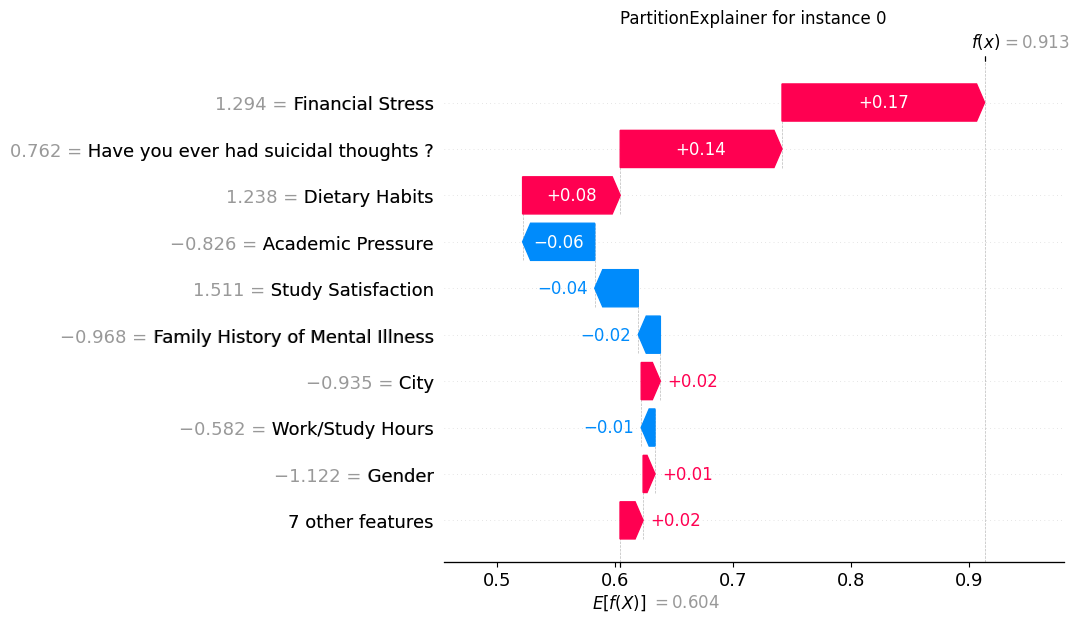

In [ ]:
fig, ax = plt.subplots()
shap.plots.waterfall(shap_values[0], show=False)
plt.title("PartitionExplainer for instance 0")
plt.show()

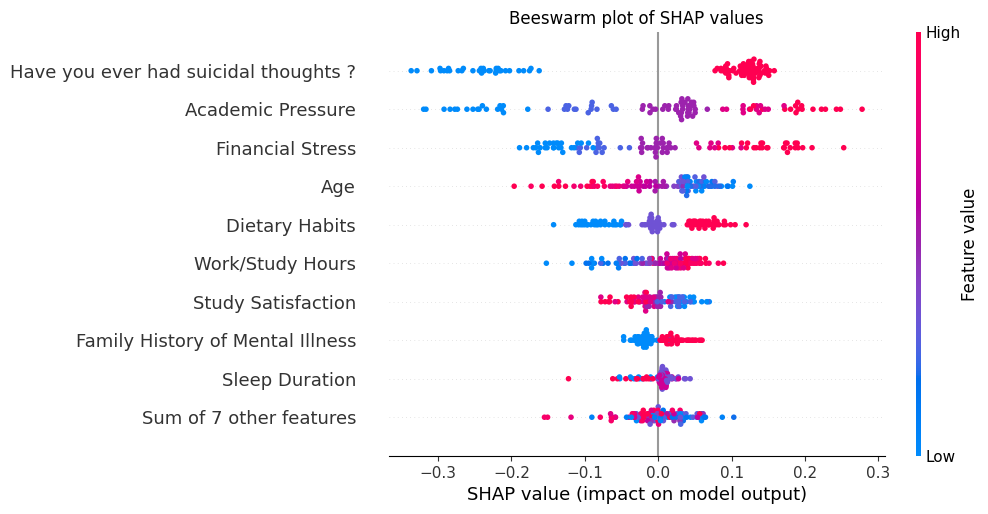

In [ ]:
shap.plots.beeswarm(shap_values, show=False)
plt.title("Beeswarm plot of SHAP values")
plt.show()

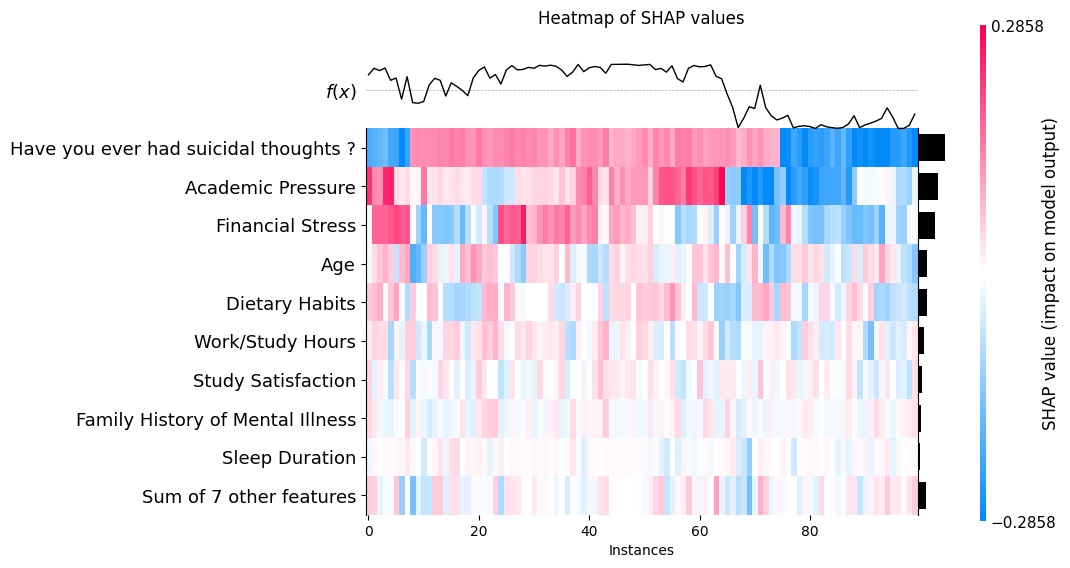

In [ ]:
shap.plots.heatmap(shap_values, show=False)
plt.title("Heatmap of SHAP values")
plt.show()

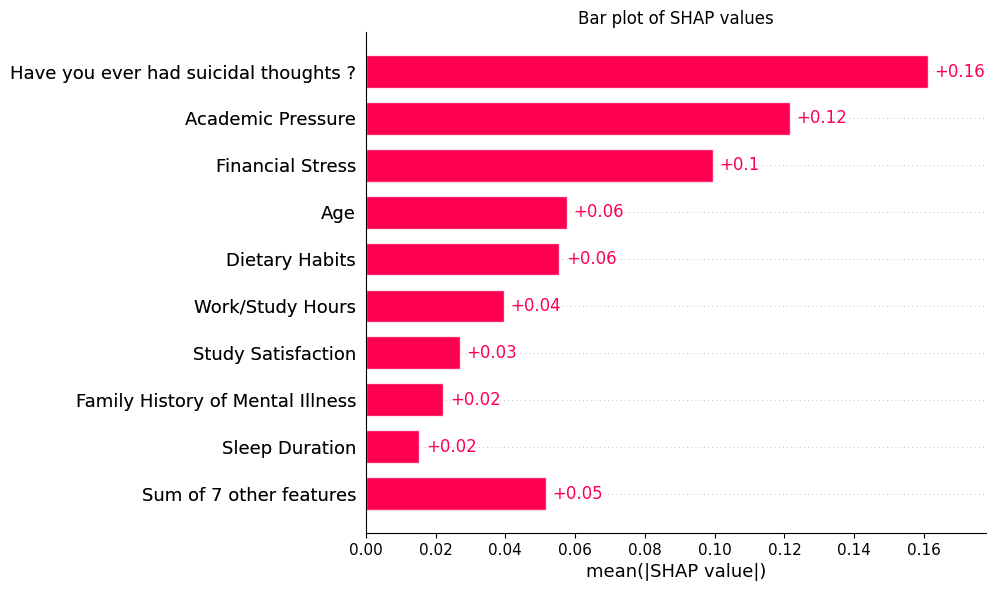

In [ ]:
shap.plots.bar(shap_values, show=False)
plt.title("Bar plot of SHAP values")
plt.show()